In [1]:
# current date, for retrieving data from proper location.
year = "2023"
month = "October"
day = "18"

## Imports and initialization

In [2]:
from matplotlib import gridspec
import scipy.signal
%config Completer.use_jedi = False
import numpy as np 
from numpy import array as arr
import pandas as pd
import plotly.offline as pltly
pltly.init_notebook_mode(connected=True)
from plotly import graph_objs as go
import math
import scipy.optimize as opt
from scipy import ndimage
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings('module')
from datetime import datetime
import uncertainties.unumpy
import IPython
import pandas as pd
import pickle
from matplotlib.ticker import ScalarFormatter
from matplotlib.pyplot import *
from matplotlib import rcParams
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# ## set matplotlib plot defaults :D
# Style controls many default colors in matplotlib plots.
# Change the following if you don't like dark backgrounds. Many other options.
import matplotlib as mpl

if False:
    # My Dark Settings
    style.use(['dark_background'])
    c = '#0A0A0A'
    mpl.rcParams['axes.facecolor'] = '#000000'
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c
else:
    # My Light Settings
    style.use(['default'])
    c = '#FFFFFF'
    mpl.rcParams['axes.facecolor'] = c
    mpl.rcParams['figure.edgecolor'] = c
    mpl.rcParams['figure.facecolor'] = c  
# the default cycling of colors in this mode isn't very good.
#rcParams['axes.prop_cycle'] = ("cycler('color', ['r','c','g','#FFFFFF','b']) + cycler('marker', ['o','v','<','>','^'])")
### General
mpl.rcParams['figure.figsize'] = (25.0, 8.0)
mpl.rcParams['axes.grid'] = True
mpl.rcParams['axes.formatter.useoffset'] = False
mpl.rcParams['grid.alpha'] = 0.15
mpl.rcParams['axes.formatter.limits'] = (-3,3)
mpl.rcParams['image.cmap'] = 'viridis'
#rcParams['image.cmap'] = dark_viridis_cmap
# to see all available options, decomment this line.
# print(mpl.rcParams)
mpl.rcParams['font.size'] = 14
viridis = cm.get_cmap('viridis', 256)
dark_viridis = []
bl = 0.15
for i in range(256):
    dark_viridis.append(list(viridis(i)))
    dark_viridis[-1][0] = dark_viridis[-1][0] *(bl+(1-bl)*i/255)
    dark_viridis[-1][1] = dark_viridis[-1][1] *(bl+(1-bl)*i/255)
    dark_viridis[-1][2] = dark_viridis[-1][2] *(bl+(1-bl)*i/255)
dark_viridis_cmap = ListedColormap(dark_viridis)
import mpl_toolkits.axes_grid1
import matplotlib.gridspec as gridspec
from skimage.transform import iradon

In [3]:
import sys
sys.path.append("..")
from Analysis_Python_Files.fitters.Gaussian import dip, double_dip,arb_1d_sum, bump, bump2, bump3, bump2r, gaussian, bump3_Sym, gaussian_2d, poly_nom
from Analysis_Python_Files.fitters.Sinc_Squared import sinc_sq3_Sym, sinc_sq
from Analysis_Python_Files.fitters import decaying_cos, exponential_decay_fixed_limit as decay, linear, LargeBeamMotExpansion, n1State
import Analysis_Python_Files.PictureWindow as pw
import Analysis_Python_Files.ExpFile as exp
# import Analysis_Python_Files.UnitConversion as uc
exp.setPath(day, month, year)
import Analysis_Python_Files.PlotlyPlotters as pp
import Analysis_Python_Files.MatplotlibPlotters as mp
import Analysis_Python_Files.MatplotlibPlotters_pres as mp_pres
import Analysis_Python_Files.MainAnalysis as ma
import Analysis_Python_Files.AnalysisHelpers as ah
import Analysis_Python_Files.Miscellaneous as misc
import Analysis_Python_Files.PopulationAnalysis as pa
import Analysis_Python_Files.MarksConstants as mc
import Analysis_Python_Files.fitters as fitters
import Analysis_Python_Files.LoadingFunctions as lf
import Analysis_Python_Files.FreeSpaceImaging as fsi
import Analysis_Python_Files.TransferAnalysis as ta
import Analysis_Python_Files.LightShiftCalculations as lsc
import Analysis_Python_Files.CalibrationAnalysis as ca
# It's important to explicitly import calPoint here or else pickling doesn't work.
from Analysis_Python_Files.CalibrationAnalysis import calPoint 
from Analysis_Python_Files.TransferAnalysisOptions import TransferAnalysisOptions as ao
import Analysis_Python_Files.ThresholdOptions as to
import Analysis_Python_Files.TransferAnalysisOptions as tao
from importlib import reload
def reloadMyModules(day_=None, month_=None, year_=None):
    reload(exp)
    if day_ is None:
        day_ = day
    if month_ is None:
        month_ = month
    if year_ is None:
        year_ = year
    exp.setPath(day_,month_,year_)
    reload(lf)
    reload(misc)
    reload(ma)
    reload(ah)
    reload(pp)
    reload(mp)
    reload(fitters)
    reload(fsi)
    reload(ta)
    reload(pa)
    reload(tao)
    reload(to)
    reload(ca)
reloadMyModules();

In [4]:
atomlocs = [2, 2, 3, 3, 1]

In [5]:
loadNone = tao.condition([0,0,0], [0,1,2], [0,0,0])

loadOne = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 1, name = 'Load any one tweezer')
# tao.condition([0 = 1st pic, 1 = 2nd pic],

loadTwo = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 2, name = 'Load any two tweezers')
loadThree = tao.condition([0,0,0], [0,1,2], [1,1,1], numRequired = 3, name = 'Load all three tweezers')
loadOuter = tao.condition([0,0,0], [0,1,2], [1,0,1], numRequired = 2, name = 'Load outer tweezers')

finCenter = tao.condition([1],[1],[1], markerWhichPicList=[1], markerLocList=[1])
# 
# loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo], [loadThree]],[finCenter for _ in range(3)]);
loadOpt= tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne], [loadTwo]],[finCenter for _ in range(2)]);
loadOneOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOne]],[finCenter for _ in range(1)]);
loadTwoOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadTwo]],[finCenter for _ in range(1)]);
loadThreeOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadThree]],[finCenter for _ in range(1)]);
loadOuterOpt = tao.TransferAnalysisOptions(atomlocs, atomlocs, 0,1, [[loadOuter]],[finCenter for _ in range(1)]);

### File 16 (2_0_rate_measurement):  

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:24:41: on (Y-M-D) 2023-10-23, And ended at 9:30:11: on 2023-10-23
Experiment Notes:  



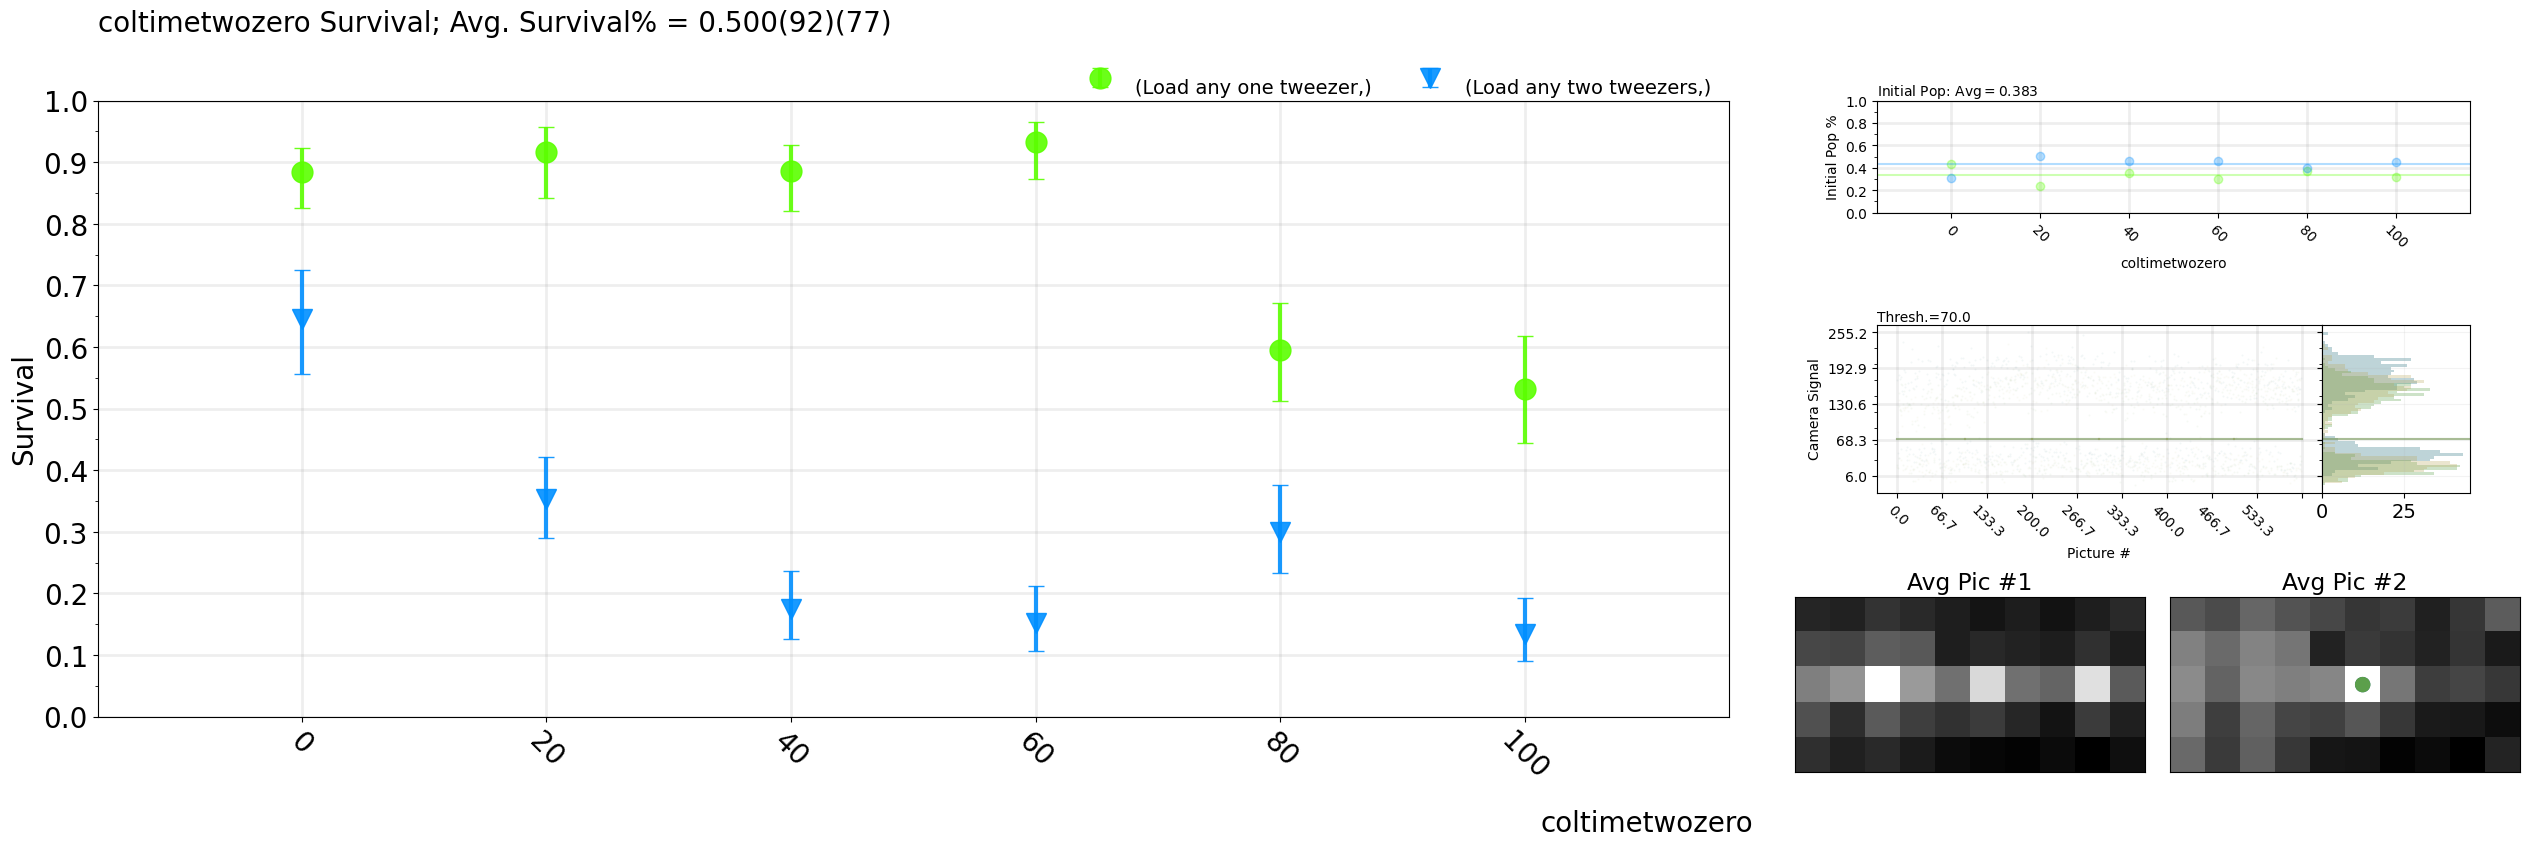

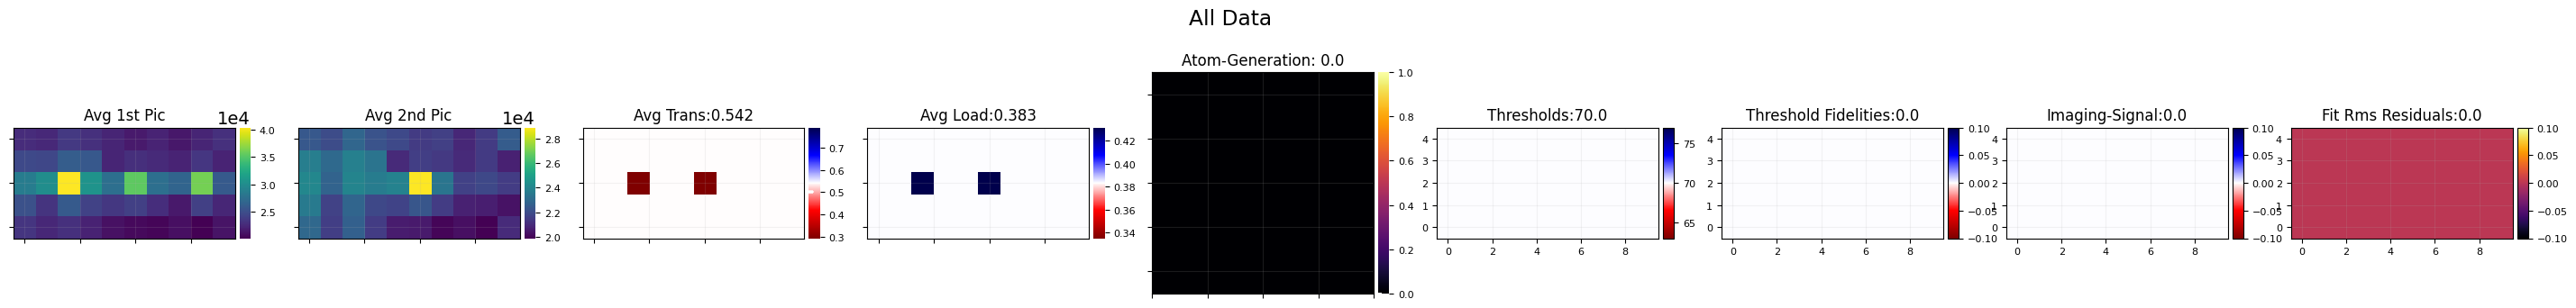

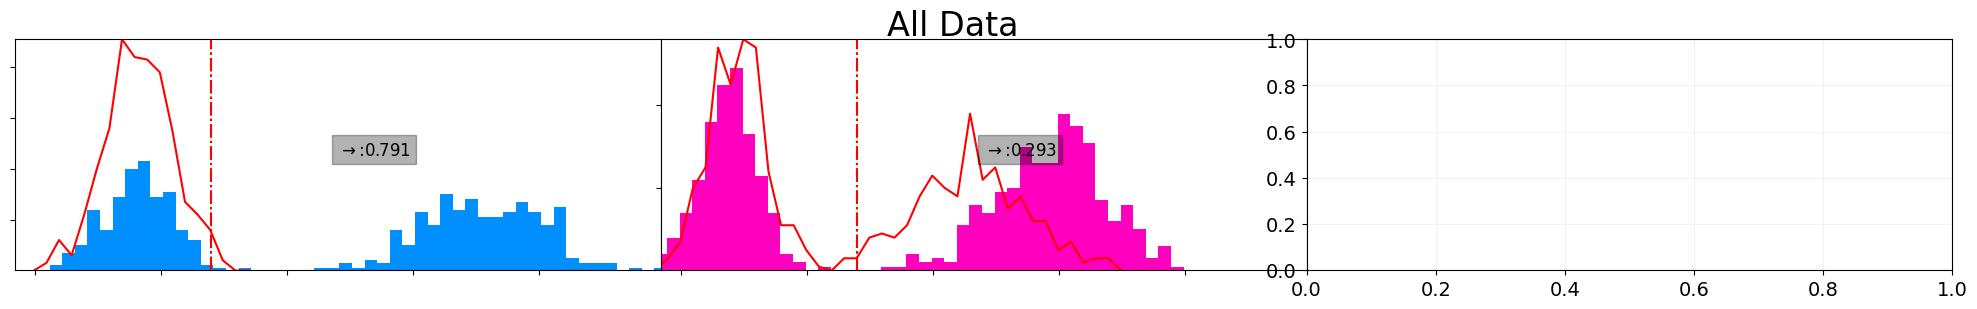

In [6]:
reloadMyModules(23,'October')
mp.Transfer(16, loadOpt, plotIndvHists = True, plotAvg=False, 
            tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 70)]);

In [7]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

### 30 uK trap depth temp measurement

Number of Pictures: 2000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:15:10: on (Y-M-D) 2023-10-18, And ended at 10:22:28: on 2023-10-18
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 2000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:15:10: on (Y-M-D) 2023-10-18, And ended at 10:22:28: on 2023-10-18
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


<Figure size 30000x9600 with 0 Axes>

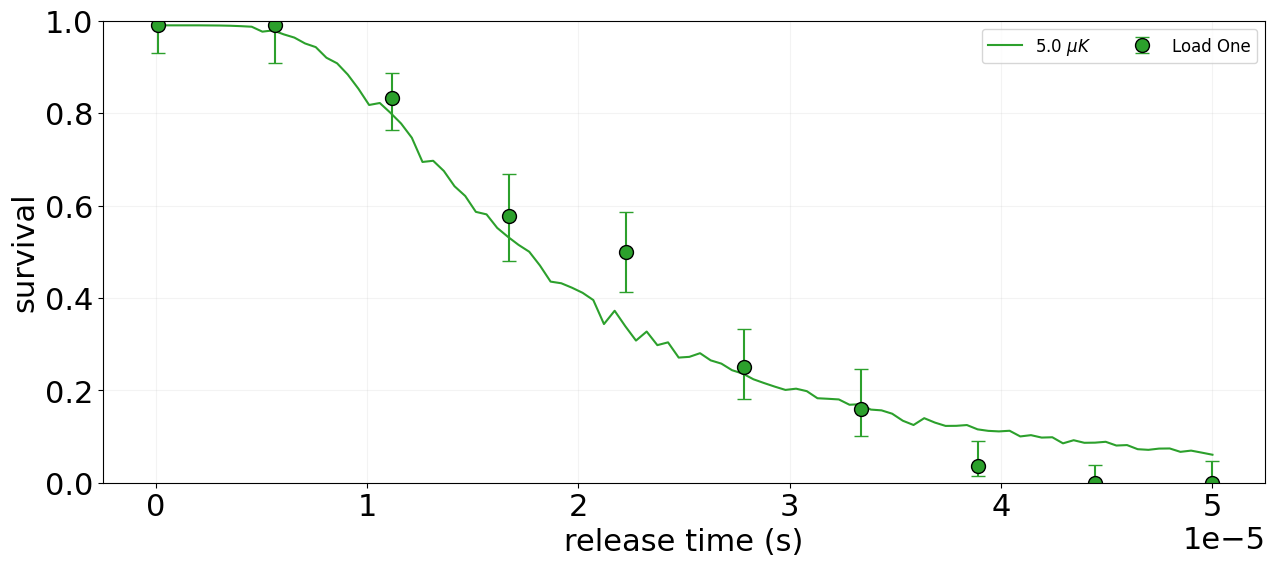

In [8]:
reloadMyModules(18,'october')
fileId = 12
threshold = 60

dataset1 = ta.standardTransferAnalysis(fileId, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

dataset2 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData1[1]=.99
t_temp = np.linspace(0, 50e-6, 100)
tempGuess = 5e-6
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5, label='Load One')
# ax.errorbar(key1*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5, label='Load Two')
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess, initial_survival=.99, tweezer_depth=10e-5, verbose=True),color=color1,label= str(tempGuess*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=23e-6, initial_survival=.8, tweezer_depth=100e-3, verbose=True),color=color2,label= '25 uK')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=26e-6, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color='tab:red',label= '30 uK')
# ax.xaxis.set_ticks(ticks)
ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 2,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 

### Hot atom temp measurements

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:16:16: on (Y-M-D) 2023-10-18, And ended at 12:18:59: on 2023-10-18
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 1000; Picture Dimensions: 5 x 10
Variations: 10;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 10:59:58: on (Y-M-D) 2023-10-18, And ended at 11:3:44: on 2023-10-18
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:5:34: on (Y-M-D) 2023-10-18, And ended at 12:8:25: on 2023-10-18
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment sta

<Figure size 30000x9600 with 0 Axes>

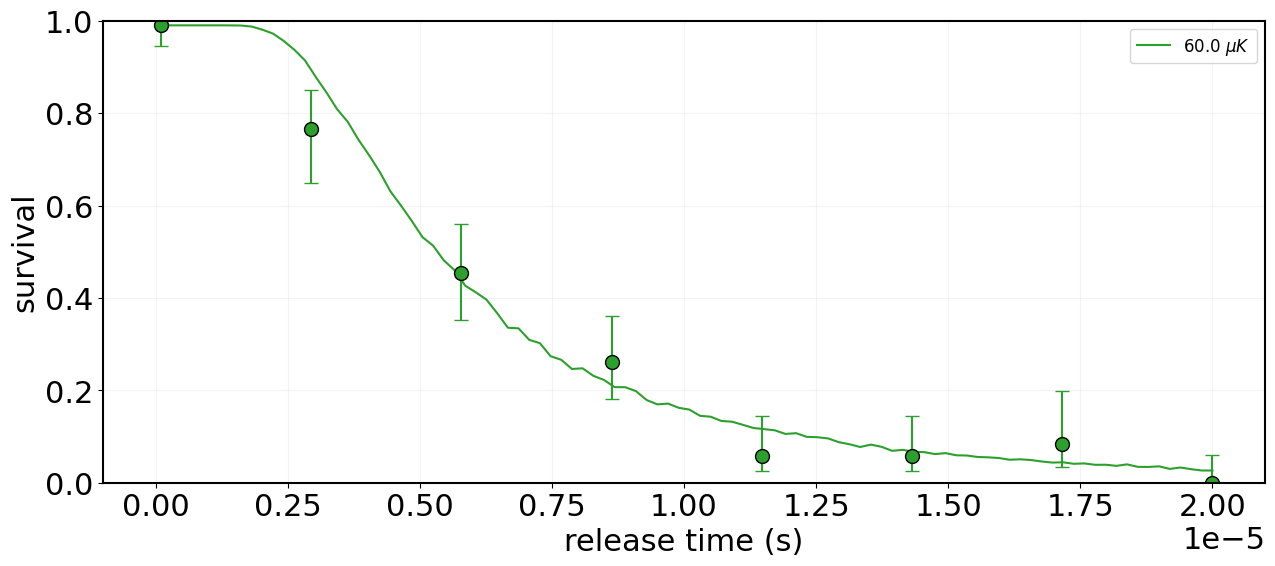

In [9]:
reloadMyModules(18,'october')
threshold = 70

# 50 uK
dataset1 = ta.standardTransferAnalysis(35, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

#100 uK
dataset2 = ta.standardTransferAnalysis(19, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key2, repetitions, initThresholds, 
            fits, avgTferData2, avgTferErr2, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset2
color2 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr2)):
    up = avgTferErr2[i][0]
    lo = avgTferErr2[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err2= [upperbound,lowerbound]   

#150 uK
dataset3 = ta.standardTransferAnalysis(33, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key3, repetitions, initThresholds, 
            fits, avgTferData3, avgTferErr3, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset3
color3 = 'tab:red'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr3)):
    up = avgTferErr3[i][0]
    lo = avgTferErr3[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err3= [upperbound,lowerbound]  

#200 uK
dataset4 = ta.standardTransferAnalysis(32, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = 50)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key4, repetitions, initThresholds, 
            fits, avgTferData4, avgTferErr4, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset4
color4 = 'tab:orange'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr4)):
    up = avgTferErr4[i][0]
    lo = avgTferErr4[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err4= [upperbound,lowerbound]  

plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData2[0]=.99
avgTferData2[0]=.99
avgTferData3[0]=.99
avgTferData4[0]=.99
tempGuess1 = 60e-6
tempGuess2 = 100e-6
tempGuess3 = 150e-6
tempGuess4 = 100e-6
t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5)
# ax.errorbar(key4*1e-3,avgTferData4, yerr=err4,ls='none',ecolor=color4,marker = 'o',markersize = 10,markerfacecolor=color4,markeredgecolor='k',capsize=5)
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color2,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess4, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color=color4,label= str(tempGuess4*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 

## Beta vs T_0 Non-retro beam, U=20 MHz, I= 2I_sat

In [10]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

### 10 uK

Number of Pictures: 800; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 12:33:14: on (Y-M-D) 2023-10-18, And ended at 12:36:41: on 2023-10-18
Experiment Notes:  

gamma = 1.2183714494667806 gamma uncertainty = 0.19445861770965098


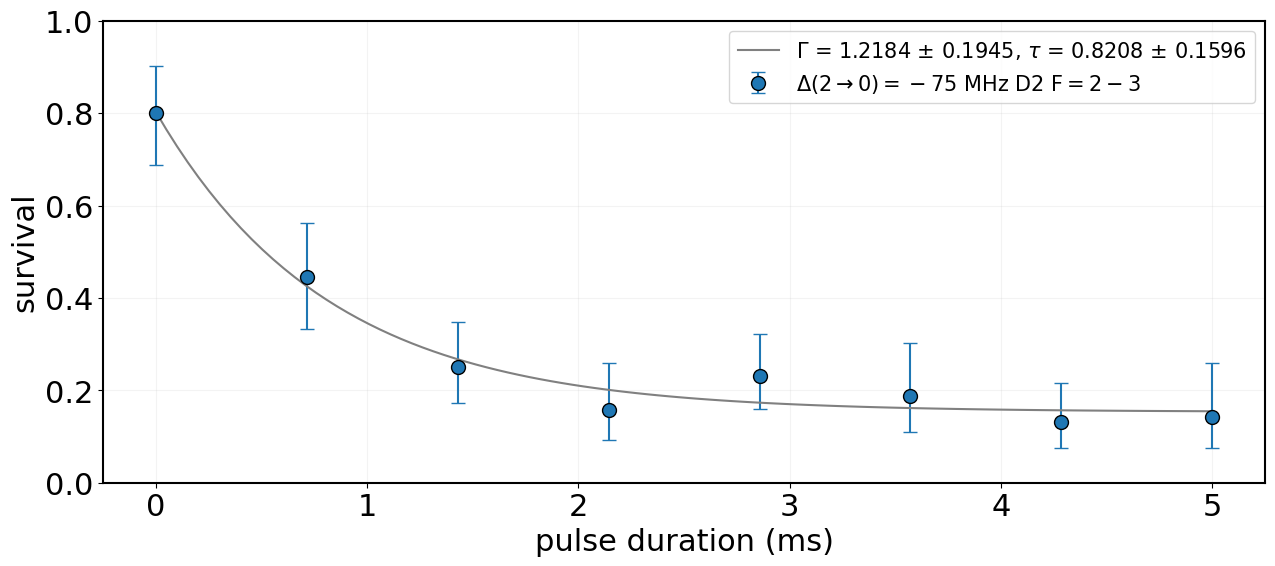

In [11]:
##pulse duration
reloadMyModules(18,'October')
fileId = 38 #18-38  21-22
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
# avgTferData1[6] = 0.1
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_10uK = decay_constant
gamma_10uK_unc  = decay_constant_uncertainty
tau_10uK = one_over_e_time
tau_10uK_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 50 uK

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 13:39:7: on (Y-M-D) 2023-10-21, And ended at 13:48:20: on 2023-10-21
Experiment Notes:  

gamma = 0.7451762747570185 gamma uncertainty = 0.20769310950583597


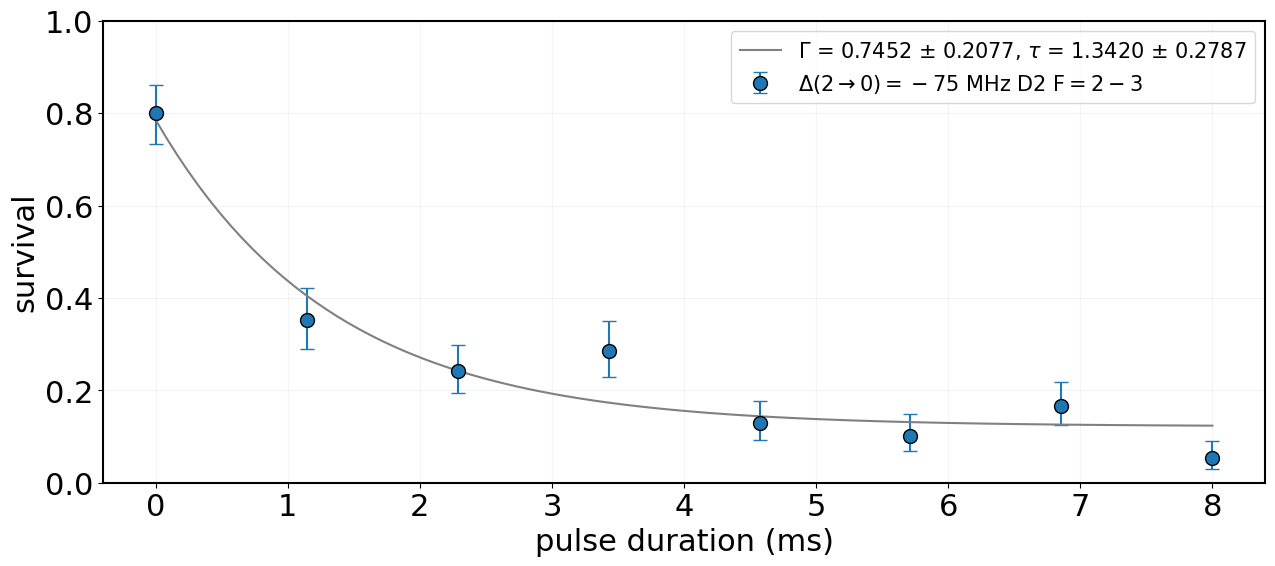

In [12]:
##pulse duration
reloadMyModules(21,'October')
fileId = 21
threshold = 75
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_50uK = decay_constant
gamma_50uK_unc = decay_constant_uncertainty
tau_50uK = one_over_e_time
tau_50uK_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 100 uK

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:45:33: on (Y-M-D) 2023-10-18, And ended at 13:57:32: on 2023-10-18
Experiment Notes:  

gamma = 0.21192815778550278 gamma uncertainty = 0.054634692226036494


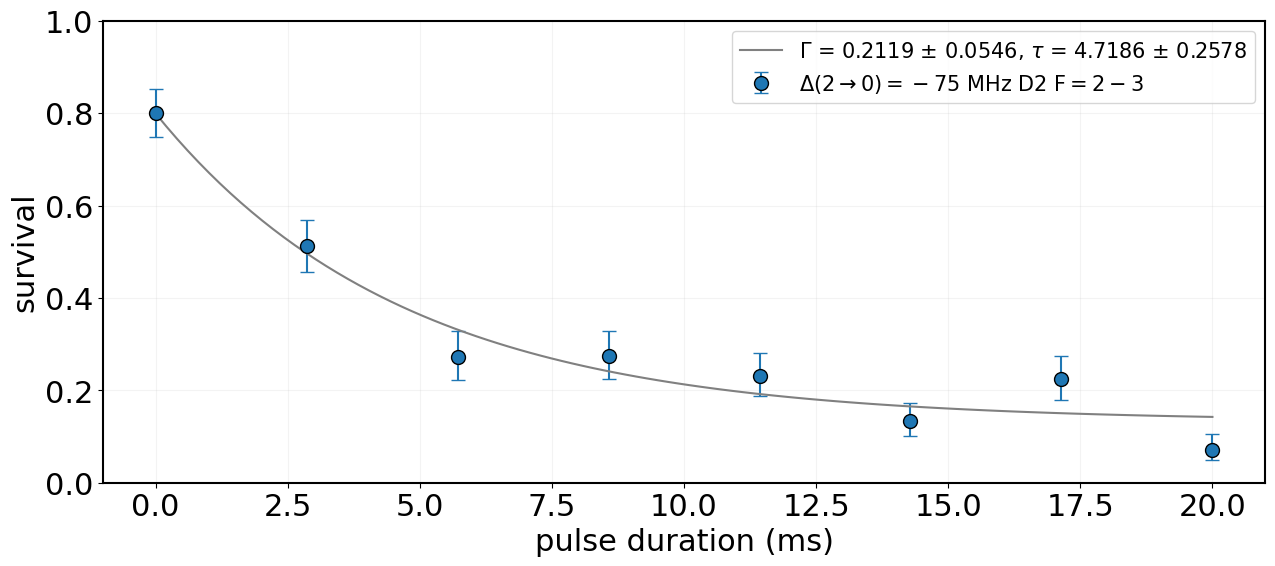

In [13]:
##pulse duration
reloadMyModules(18,'October')
fileId = 47
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = .8


x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_100uK = decay_constant
gamma_100uK_unc  = decay_constant_uncertainty
tau_100uK = one_over_e_time
tau_100uK_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 150 uK

Number of Pictures: 600; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 50;	Exp File Version: 4;
Experiment started at (H:M:S) 10:51:38: on (Y-M-D) 2023-10-23, And ended at 10:54:28: on 2023-10-23
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.0824392428462488 gamma uncertainty = 0.022850201633475634


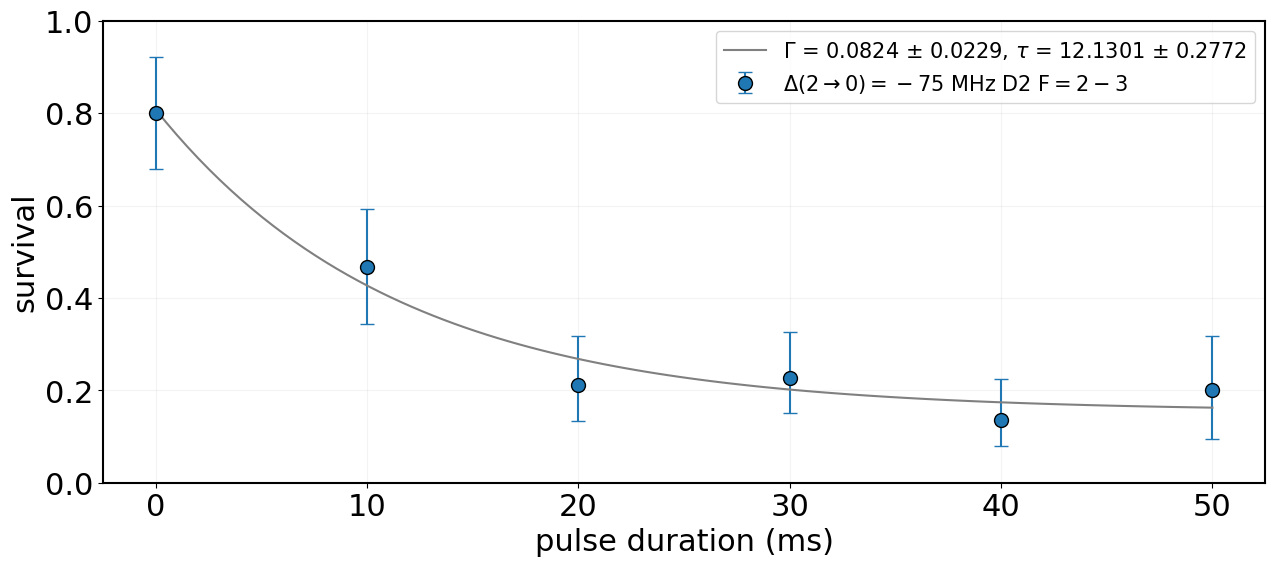

In [14]:
##pulse duration
reloadMyModules(23,'October')
fileId = 25
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]

avgTferData1[0] = .8
avgTferData1[5] = .2
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]-0.005
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_150uK = decay_constant
gamma_150uK_unc  = decay_constant_uncertainty
tau_150uK = one_over_e_time
tau_150uK_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 200 uK

Number of Pictures: 1200; Picture Dimensions: 5 x 10
Variations: 6;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 9:24:41: on (Y-M-D) 2023-10-23, And ended at 9:30:11: on 2023-10-23
Experiment Notes:  

gamma = 0.04345603471926453 gamma uncertainty = 0.011851455669858395


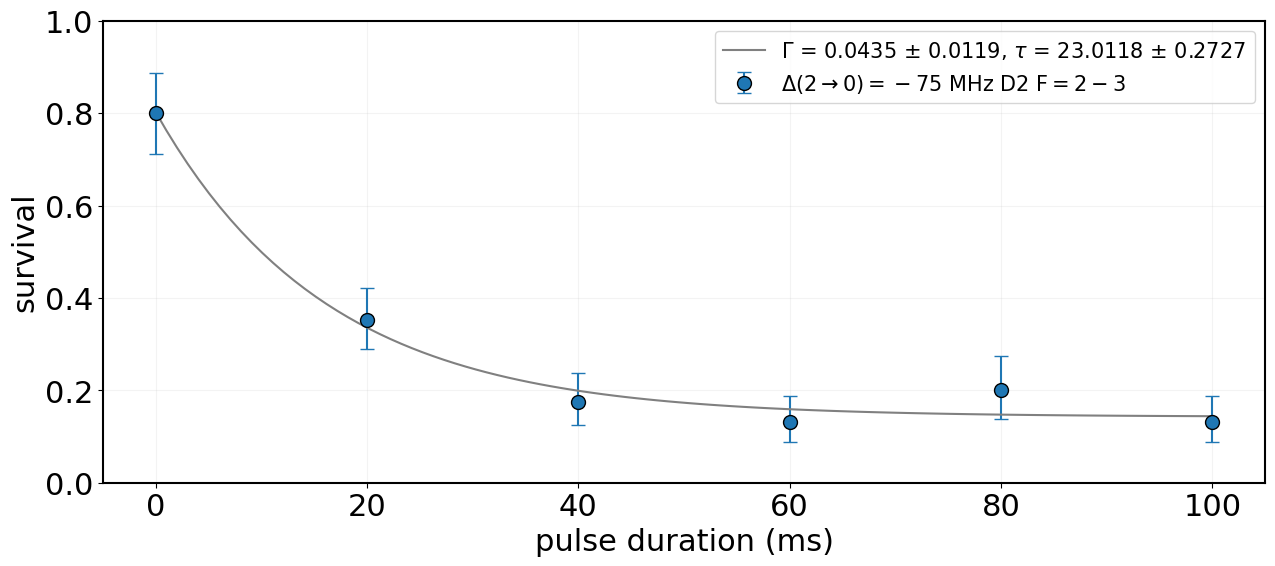

In [15]:
##pulse duration
reloadMyModules(23,'October')
fileId = 16
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1 = avgTferData1
avgTferData1[0] = .8
avgTferData1[4] = .2

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]-.018
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_200uK = decay_constant
gamma_200uK_unc  = decay_constant_uncertainty
tau_200uK = one_over_e_time
tau_200uK_unc  = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### PLOT Beta vs T_0 non-retro

In [16]:
def betaCalc(gamma,trap_depth,T,N): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 850e-9
    w_0 = 0.7e-6 # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    # w_r = 135000*(2*np.pi)
    # w_a = 25000*(2*np.pi)
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*mc.k_B * T/(mc.Rb87_M*w**2))**(3/2))*1e6
    beta = gamma*1e3*V*2*np.sqrt(2)*N*(N-1)
    # print('beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    return beta


28.036875829507366
2.507694409259969


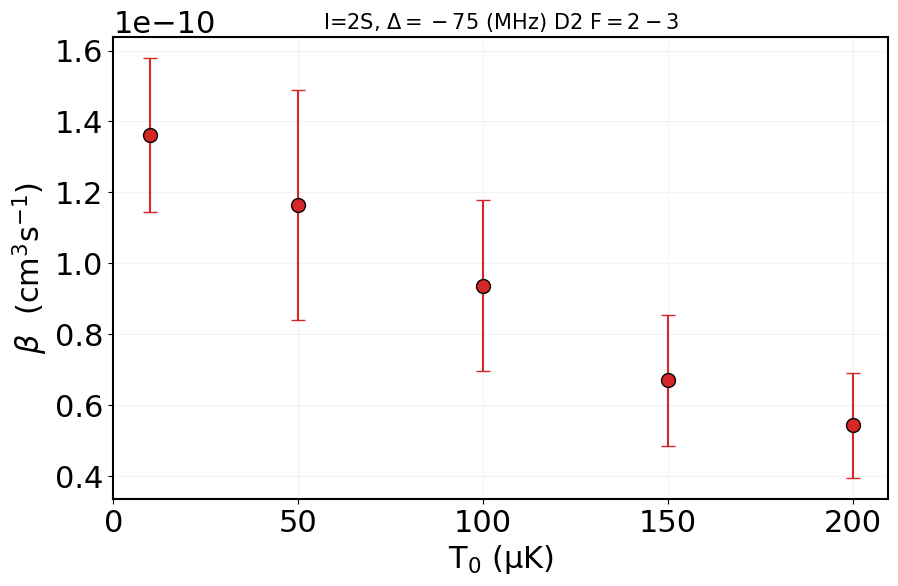

In [17]:
T = [10,50,100,150,200]

print(gamma_10uK/gamma_200uK)
trapDepth=1e-3
beta_10uK = betaCalc(gamma_10uK,.25e-3,10e-6,2)
beta_50uK = betaCalc(gamma_50uK,trapDepth,50e-6,2)
beta_100uK = betaCalc(gamma_100uK,trapDepth,100e-6,2)
beta_150uK = betaCalc(gamma_150uK,trapDepth,150e-6,2)
beta_200uK = betaCalc(gamma_200uK,trapDepth,200e-6,2)
beta_10uK_unc = betaCalc(gamma_10uK_unc,.25e-3,10e-6,2)
beta_50uK_unc = betaCalc(gamma_50uK_unc,trapDepth,50e-6,2)
beta_100uK_unc = betaCalc(gamma_100uK_unc,trapDepth,100e-6,2)
beta_150uK_unc = betaCalc(gamma_150uK_unc,trapDepth,150e-6,2)
beta_200uK_unc = betaCalc(gamma_200uK_unc,trapDepth,200e-6,2)

beta = [beta_10uK,beta_50uK,beta_100uK,beta_150uK,beta_200uK]
beta_unc = [beta_10uK_unc,beta_50uK_unc,beta_100uK_unc,beta_150uK_unc,beta_200uK_unc]
beta_error = [beta_unc,beta_unc]

color1 = 'tab:red'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(T,beta, yerr=beta_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(.75e-10,1.75e-10)
# ax.set_yscale('log')
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\mathrm{T_0 \ (\mu K)}$')
plt.title(r'I=2S, $ \Delta = -75 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=15) 
plt.rcParams["axes.linewidth"] = 1.5

labelValues = [0,50,100,150,200]
labels = [str(T0) for T0 in labelValues] 
plt.xticks(labelValues, labelValues);
print(beta_10uK/beta_200uK)

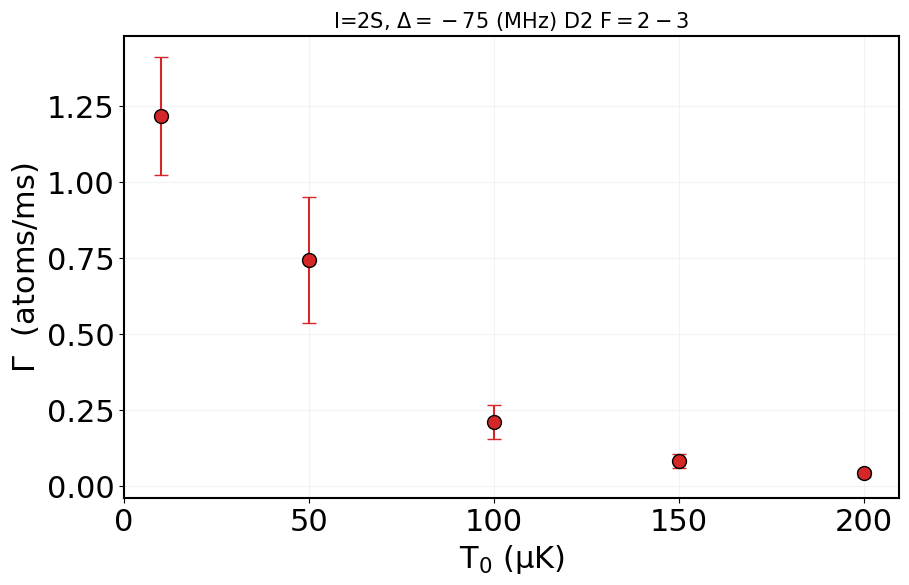

In [18]:
T = [10,50,100,150,200]

gamma = [gamma_10uK,gamma_50uK,gamma_100uK,gamma_150uK,gamma_200uK]
gamma_unc = [gamma_10uK_unc,gamma_50uK_unc,gamma_100uK_unc,gamma_150uK_unc,gamma_200uK_unc]
gamma_error = [gamma_unc,gamma_unc]

color1 = 'tab:red'
fig, ax = plt.subplots(figsize=(10, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(T,gamma, yerr=gamma_error,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.set_ylim(1e-20,1.5e-12)
# ax.set_yscale('log')
plt.ylabel(r'$ \Gamma \ \ \mathrm{(atoms/ms})} $')
plt.xlabel(r'$\mathrm{T_0 \ (\mu K)}$')
plt.title(r'I=2S, $ \Delta = -75 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=15) 
plt.rcParams["axes.linewidth"] = 1.5
labelValues = [0,50,100,150,200]
labels = [str(T0) for T0 in labelValues] 
plt.xticks(labelValues, labelValues);

In [19]:
200/10

20.0

In [20]:
beta_10uK/beta_200uK

2.507694409259969

In [21]:
gamma_10uK/(gamma_200uK)

28.036875829507366

In [22]:
20/(beta_10uK/beta_200uK)

7.975453438882964

## Beta vs T - PGC beam, U=20 MHz, I= 2I_sat

In [23]:
def decay_exponential(x, A, k, C):
    return A * np.exp(-k * x) + C

### steady state temp measurements

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:36:33: on (Y-M-D) 2023-10-20, And ended at 10:42:30: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

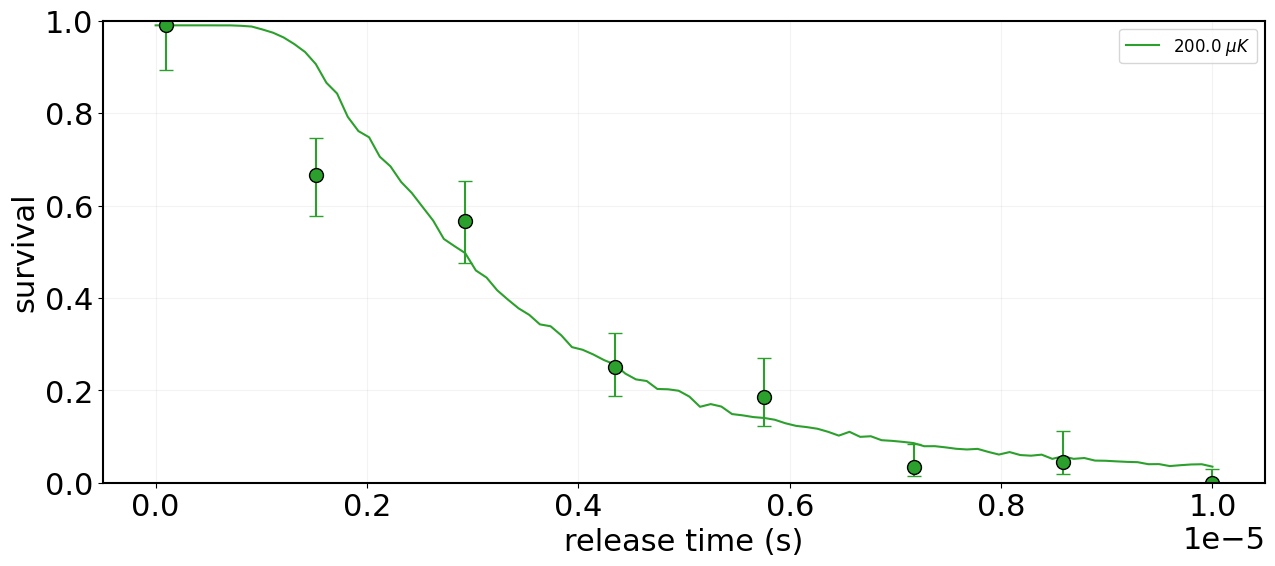

In [24]:
reloadMyModules(20,'october')
threshold = 60

# 50 uK
dataset1 = ta.standardTransferAnalysis(11, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]



plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
# avgTferData1[1]=.9
tempGuess1 = 200e-6

t_temp = np.linspace(0, 10e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')


ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 10:52:59: on (Y-M-D) 2023-10-20, And ended at 10:58:56: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

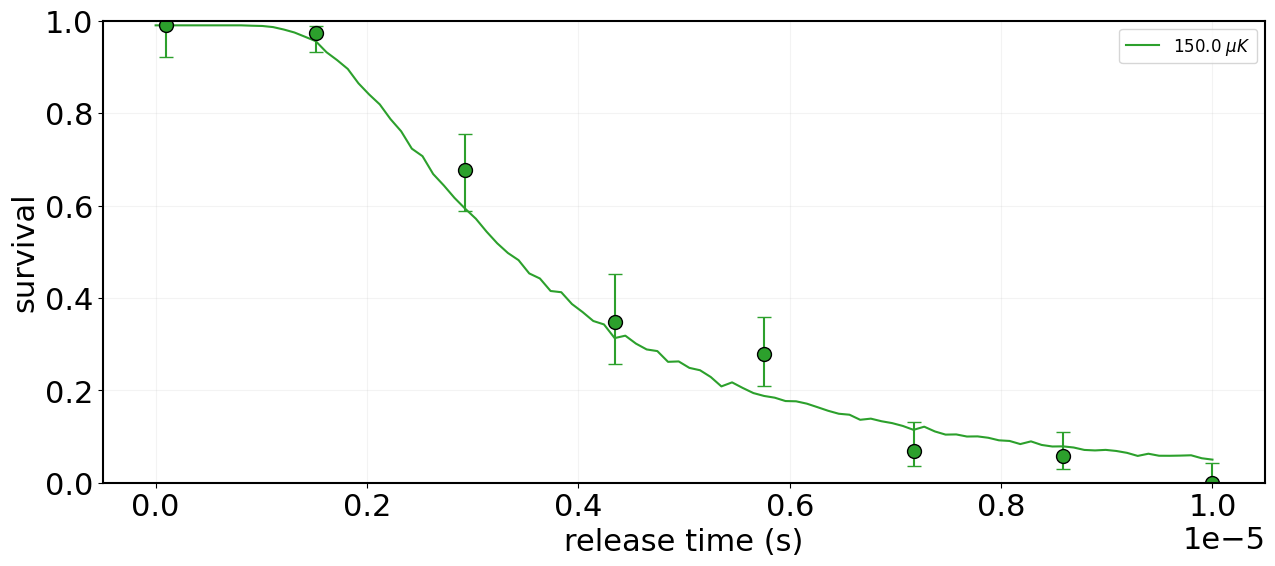

In [25]:
reloadMyModules(20,'october')
threshold = 60

# 50 uK
dataset1 = ta.standardTransferAnalysis(13, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]



plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
tempGuess1 = 150e-6

t_temp = np.linspace(0, 10e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')


ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 11:35:32: on (Y-M-D) 2023-10-20, And ended at 11:41:15: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

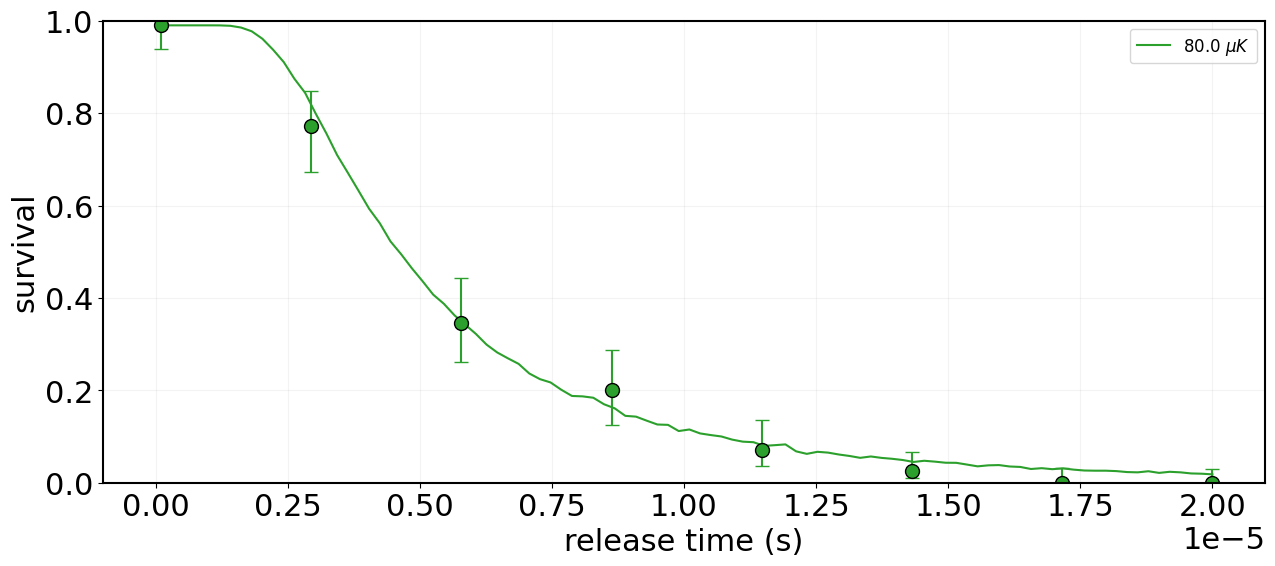

In [26]:
reloadMyModules(20,'october')
threshold = 80

# sigma+sigma+
dataset1 = ta.standardTransferAnalysis(19, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]



plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData1[3]=.2

tempGuess1 = 80e-6

t_temp = np.linspace(0, 20e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5)
# ax.errorbar(key4*1e-3,avgTferData4, yerr=err4,ls='none',ecolor=color4,marker = 'o',markersize = 10,markerfacecolor=color4,markeredgecolor='k',capsize=5)
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color2,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess4, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color=color4,label= str(tempGuess4*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 11:21:18: on (Y-M-D) 2023-10-20, And ended at 11:26:10: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.



<Figure size 30000x9600 with 0 Axes>

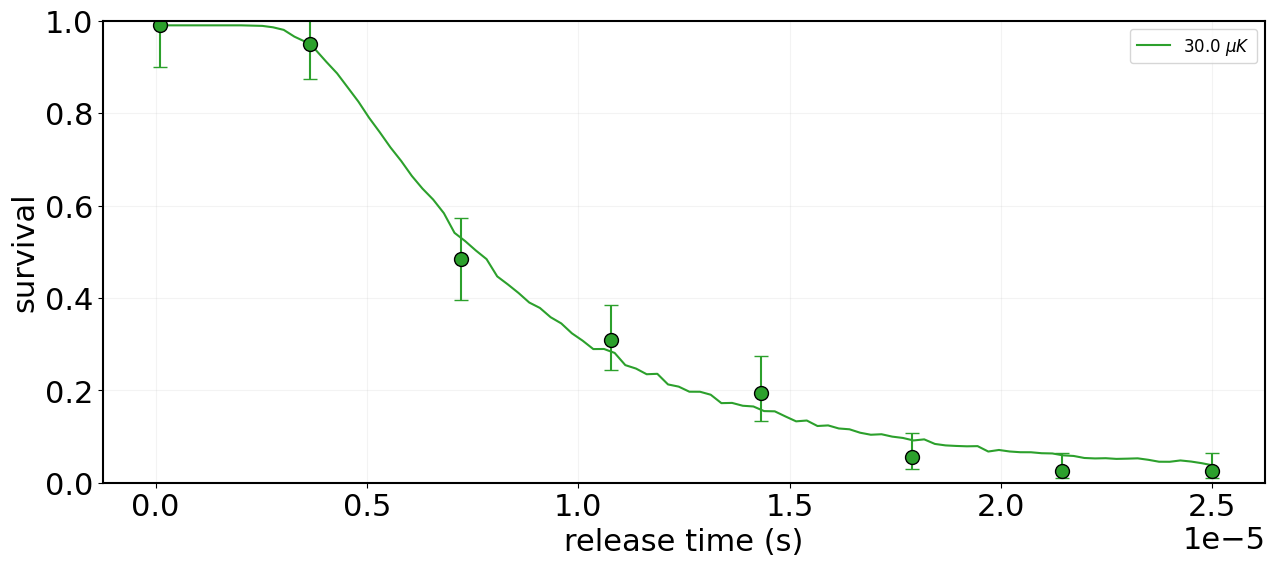

In [27]:
reloadMyModules(20,'october')
threshold = 80

# sigma+sigma+
dataset1 = ta.standardTransferAnalysis(16, loadOneOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1

color1 = 'tab:green'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]



plt.figure(dpi=1200)
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 22}

matplotlib.rc('font', **font)


fig, ax = plt.subplots(figsize=(15, 6))

t = np.linspace(key1[0], max(key1), len(key1))
ticks = np.arange(0,max(key1),100)
avgTferData1[0]=.99
avgTferData1[1]=.95

tempGuess1 = 30e-6

t_temp = np.linspace(0, 25e-6, 100)
ax.errorbar(key1*1e-3,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,markerfacecolor=color1,markeredgecolor='k',capsize=5)
# ax.errorbar(key2*1e-3,avgTferData2, yerr=err2,ls='none',ecolor=color2,marker = 'o',markersize = 10,markerfacecolor=color2,markeredgecolor='k',capsize=5)
# ax.errorbar(key3*1e-3,avgTferData3, yerr=err3,ls='none',ecolor=color3,marker = 'o',markersize = 10,markerfacecolor=color3,markeredgecolor='k',capsize=5)
# ax.errorbar(key4*1e-3,avgTferData4, yerr=err4,ls='none',ecolor=color4,marker = 'o',markersize = 10,markerfacecolor=color4,markeredgecolor='k',capsize=5)
ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess1, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color1,label= str(tempGuess1*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess2, initial_survival=.99, tweezer_depth=10e-3, verbose=True),color=color2,label= str(tempGuess2*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess3, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color=color3,label= str(tempGuess3*1e6)+r'$ \ \mu K$')
# ax.plot(t_temp, mp.get_survival_release_capture(t_temp, T=tempGuess4, initial_survival=.99, tweezer_depth=100e-3, verbose=True),color=color4,label= str(tempGuess4*1e6)+r'$ \ \mu K$')

ax.grid(which='minor', alpha=.1)
# plt.legend(bbox_to_anchor=(.6, 1.001), ncol = 2,prop={'size': 15},frameon=False)
plt.legend(loc=1, ncol = 1,prop={'size': 12})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel('release time (s)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='sci') 

### 30 uK

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 14:48:15: on (Y-M-D) 2023-10-20, And ended at 14:54:32: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 18.518029608869274 gamma uncertainty = 4.201788125633634


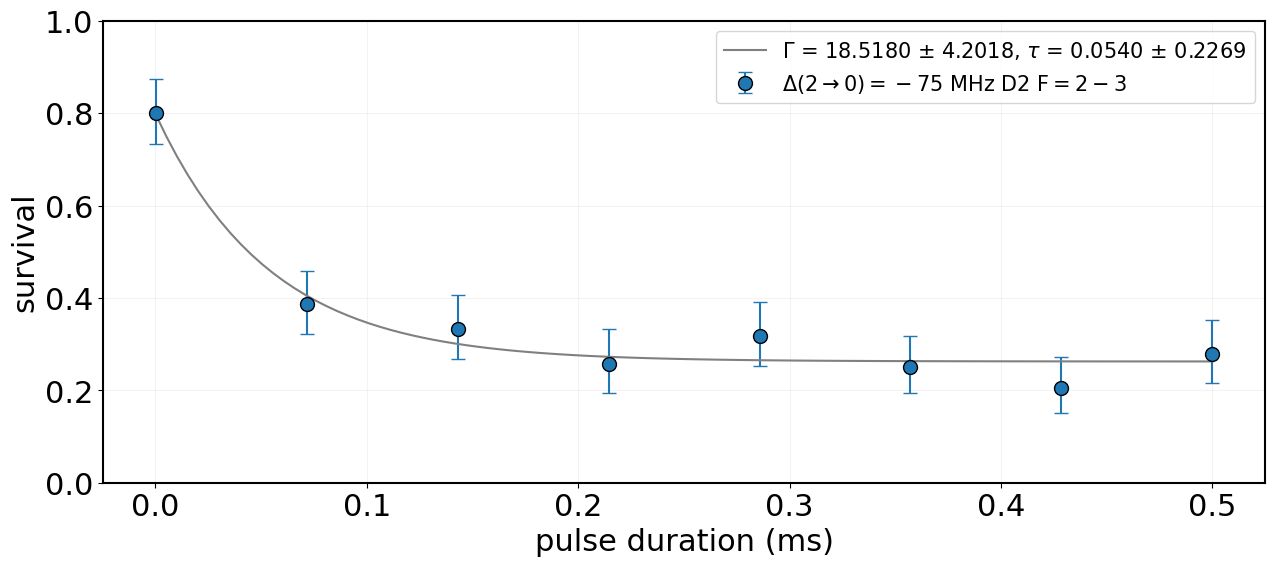

In [28]:
##pulse duration
reloadMyModules(20,'October')
fileId = 44
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_30uK_2Isat = decay_constant
gamma_30uK_2Isat_unc = decay_constant_uncertainty
tau_30uK_2Isat = one_over_e_time
tau_30uK_2Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 85 uK 

Number of Pictures: 2400; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 150;	Exp File Version: 4;
Experiment started at (H:M:S) 23:28:43: on (Y-M-D) 2023-10-20, And ended at 23:37:51: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 5.483273809108327 gamma uncertainty = 1.5165197291029544


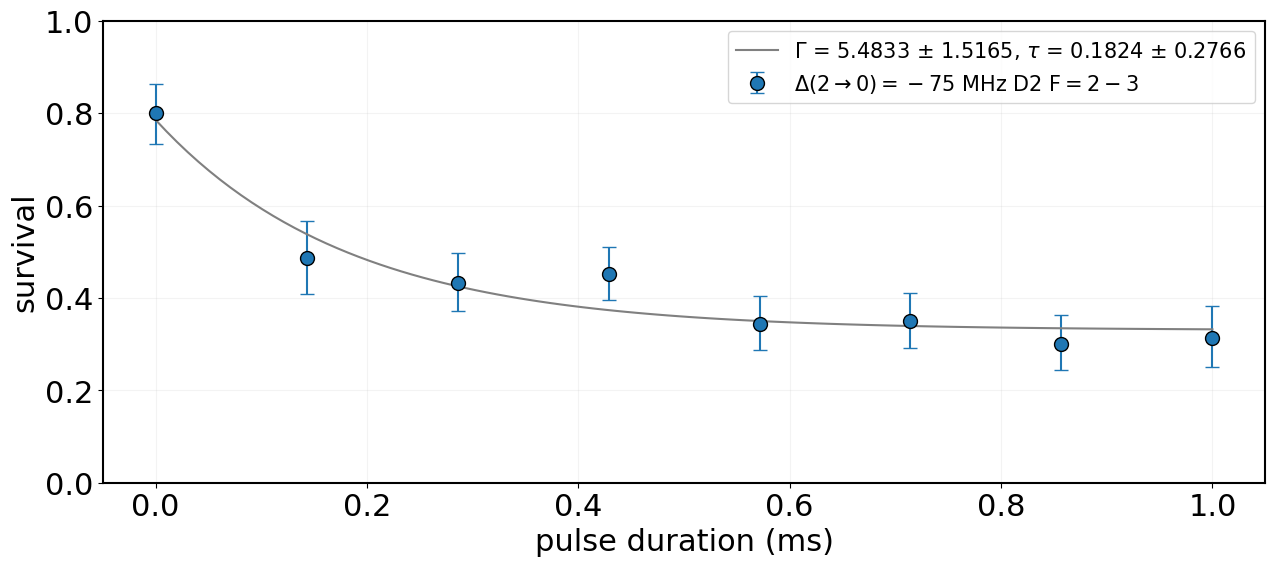

In [29]:
##pulse duration
reloadMyModules(20,'October')
fileId = 63  
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_85uK_2Isat = decay_constant
gamma_85uK_2Isat_unc = decay_constant_uncertainty
tau_85uK_2Isat = one_over_e_time
tau_85uK_2Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 150 uK

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:52:8: on (Y-M-D) 2023-10-20, And ended at 15:58:45: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 1.0565759733338729 gamma uncertainty = 0.40470912179408414


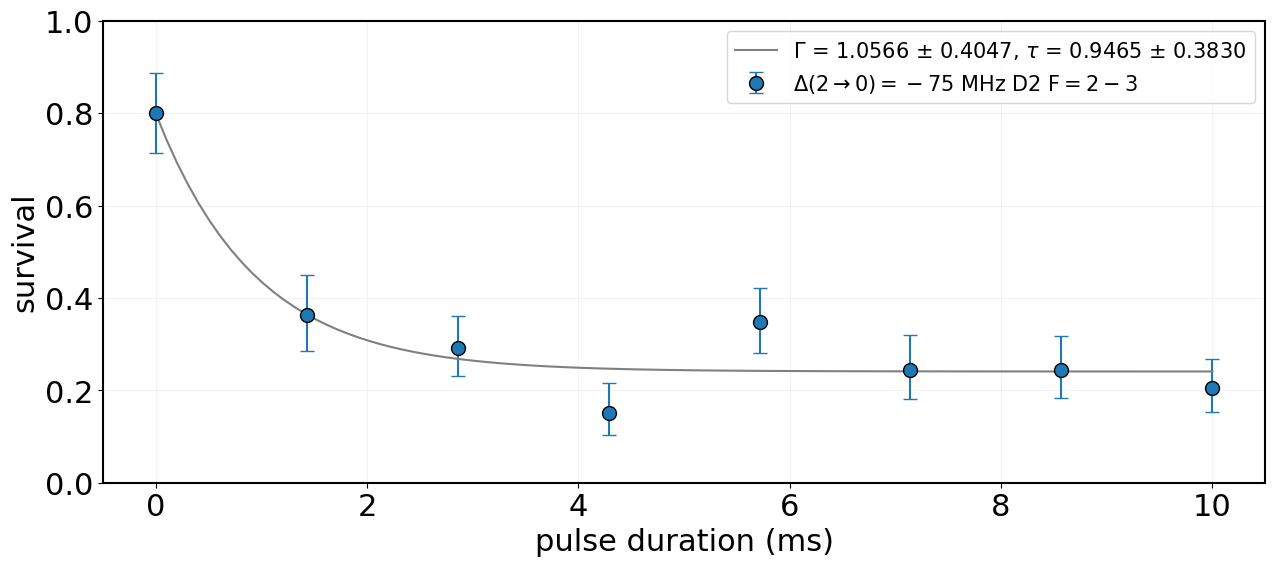

In [30]:
##pulse duration
reloadMyModules(20,'October')
fileId = 50 
threshold = 80
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8



x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_150uK_2Isat = decay_constant
gamma_150uK_2Isat_unc = decay_constant_uncertainty
tau_150uK_2Isat = one_over_e_time
tau_150uK_2Isat = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 200 uK

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 7:6:10: on (Y-M-D) 2023-10-21, And ended at 7:18:20: on 2023-10-21
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.40407438363051057 gamma uncertainty = 0.15383268953762563


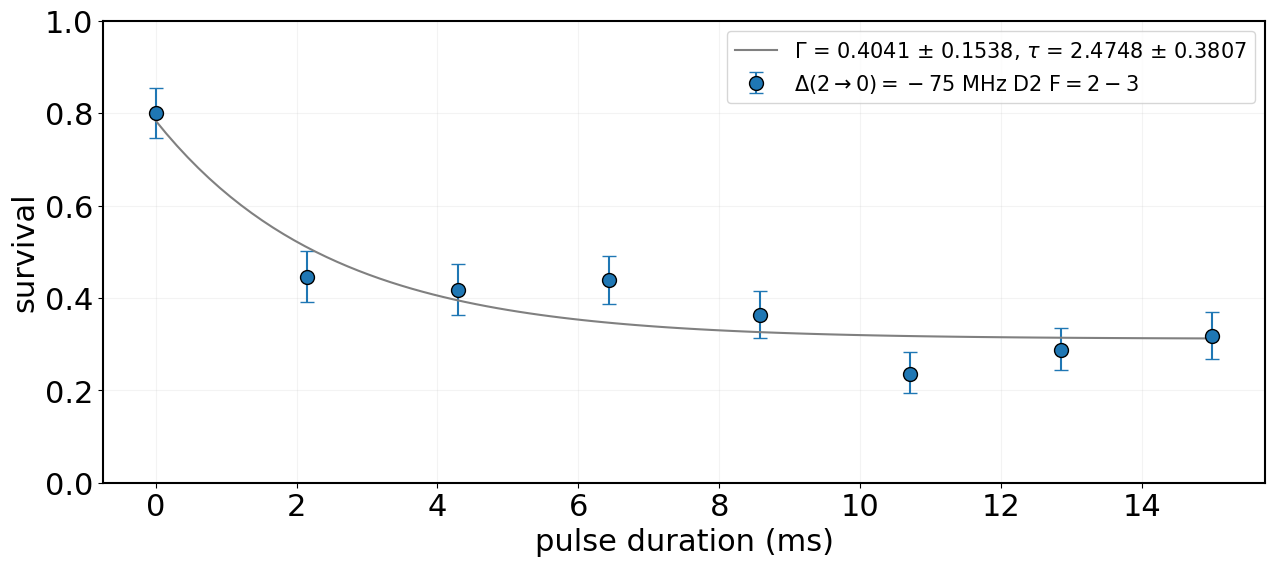

In [31]:
##pulse duration
reloadMyModules(21,'October')
fileId = 5
threshold = 55
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_200uK_2Isat = decay_constant
gamma_200uK_2Isat_unc = decay_constant_uncertainty
tau_200uK_2Isat = one_over_e_time
tau_200uK_2Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## Beta vs T PGC beam, U=20 MHz, I= I_sat

### 30 uK

Number of Pictures: 1600; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 100;	Exp File Version: 4;
Experiment started at (H:M:S) 15:36:2: on (Y-M-D) 2023-10-20, And ended at 15:42:19: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 10.660493093337422 gamma uncertainty = 2.0834023556581482


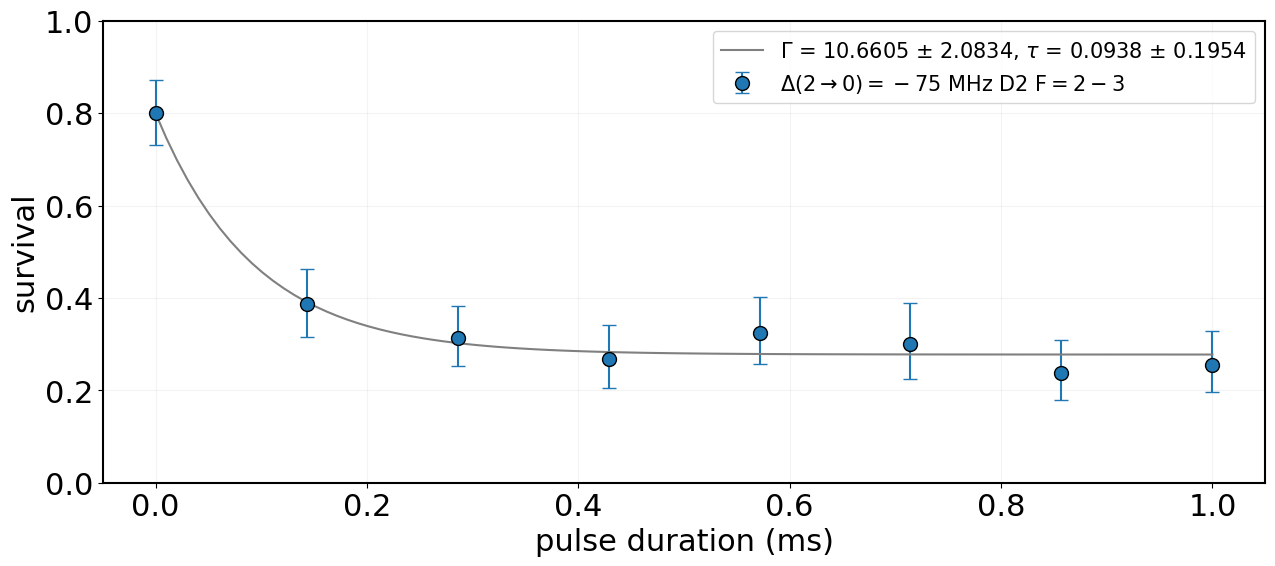

In [32]:
##pulse duration
reloadMyModules(20,'October')
fileId = 48
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_30uK_Isat = decay_constant
gamma_30uK_Isat_unc = decay_constant_uncertainty
tau_30uK_Isat = one_over_e_time
tau_30uK_Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 85 uK

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:12:48: on (Y-M-D) 2023-10-18, And ended at 13:24:43: on 2023-10-18
Experiment Notes:  

gamma = 2.6514511478363967 gamma uncertainty = 0.5387742991827124


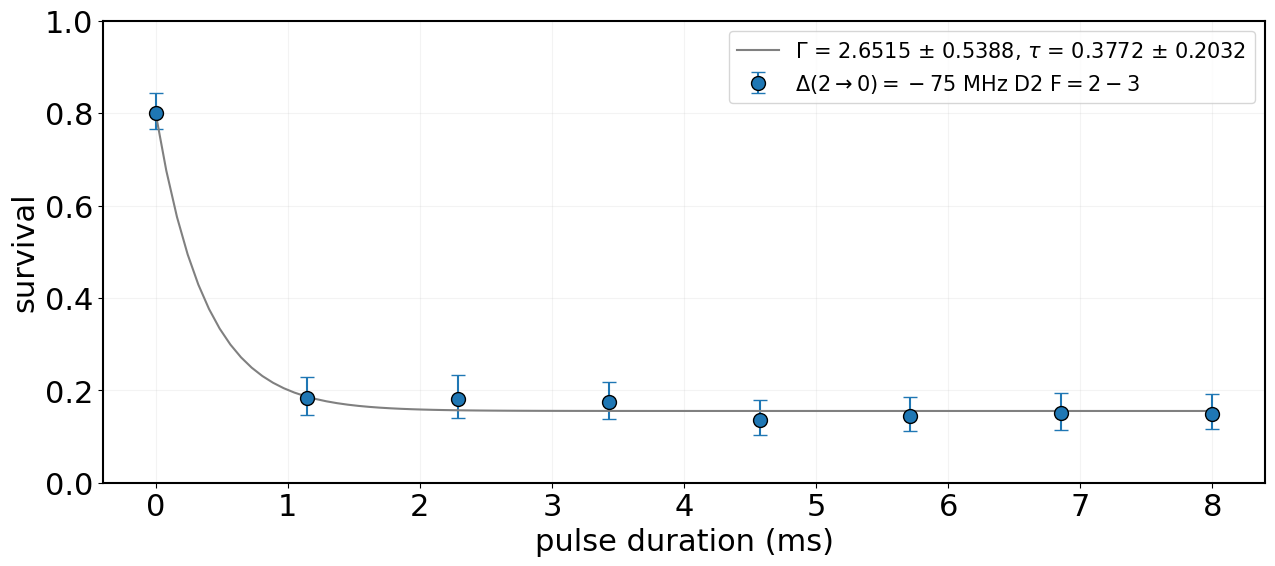

In [33]:
##pulse duration
reloadMyModules(18,'October')
fileId = 44
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
# avgTferData1[7] = 0.25

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_85uK_Isat = decay_constant
gamma_85uK_Isat_unc = decay_constant_uncertainty
tau_85uK_Isat = one_over_e_time
tau_85uK_Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 150 uK 

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 13:26:1: on (Y-M-D) 2023-10-20, And ended at 13:38:57: on 2023-10-20
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.6915735080954807 gamma uncertainty = 0.1250544039809241


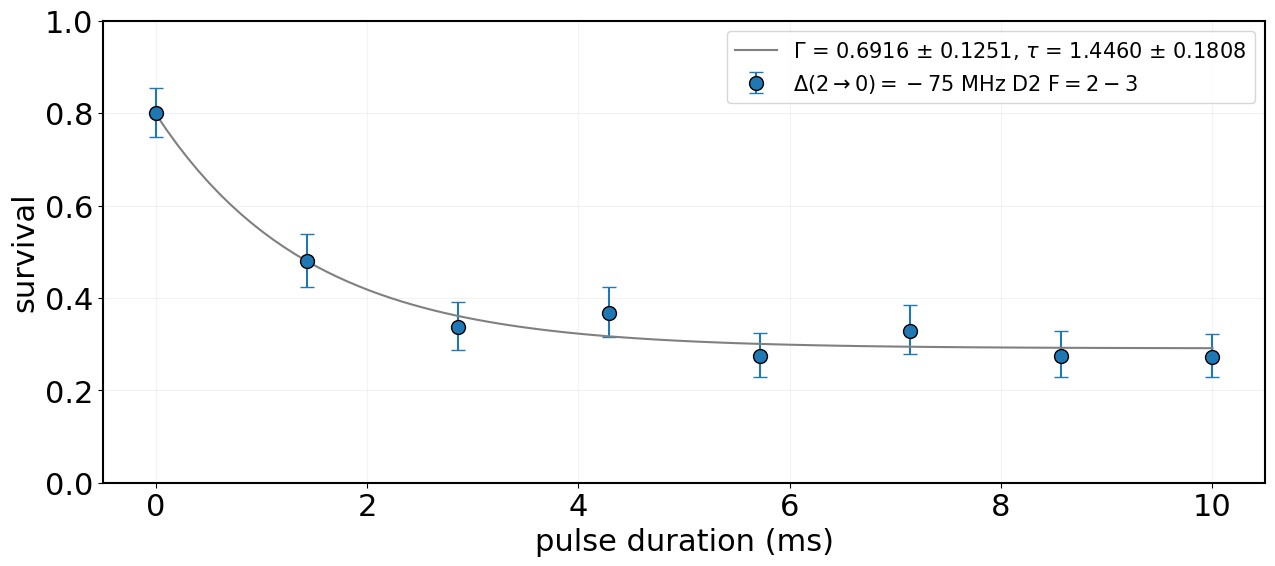

In [34]:
##pulse duration
reloadMyModules(20,'October')
fileId = 34
threshold = 85
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8

x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_150uK_Isat = decay_constant
gamma_150uK_Isat_unc = decay_constant_uncertainty
tau_150uK_Isat = one_over_e_time
tau_150uK_Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

### 200 uK 

Number of Pictures: 3200; Picture Dimensions: 5 x 10
Variations: 8;	Repetitions: 200;	Exp File Version: 4;
Experiment started at (H:M:S) 9:21:20: on (Y-M-D) 2023-10-21, And ended at 9:33:30: on 2023-10-21
Experiment Notes: HDF5 NOT ANNOTATED: please call exp.Annotate() to annotate this file.

gamma = 0.2720973733998136 gamma uncertainty = 0.07848789984599677


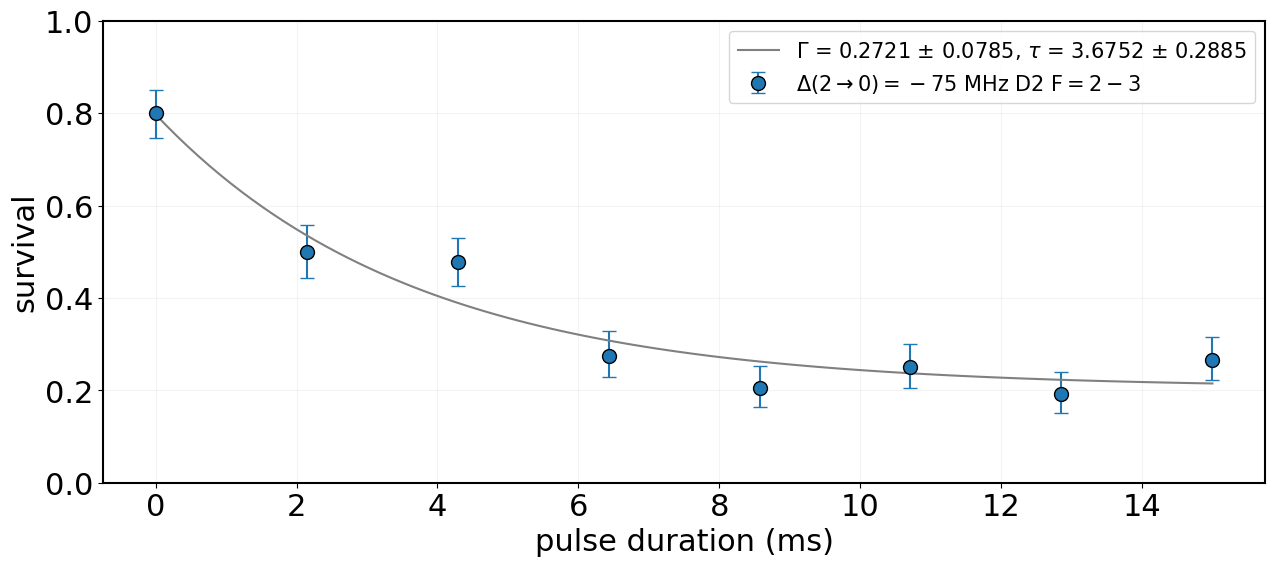

In [35]:
##pulse duration
reloadMyModules(21,'October')
fileId = 6
threshold = 60
dataset1 = ta.standardTransferAnalysis(fileId, loadTwoOpt, tOptions = [to.ThresholdOptions(manualThreshold = True, manualThresholdValue = threshold)]);
(tferAtomsVarAvg, tferAtomsVarErrs, loadAtomsVarAvg, initPicCounts, keyName, key1, repetitions, initThresholds, 
            fits, avgTferData1, avgTferErr1, avgFit, avgPics, genAvgs, genErrs, tferVarAvg, tferVarErr, initAtomImages, 
            tferAtomImages, tferPicCounts, tferThresholds, fitModules, basicInfoStr, ensembleHits, tOptions, analysisOpts,
            tferAtomsPs, tferAtomsPs, tferList, isAnnotated, hmm) = dataset1
color1 = 'tab:blue'
upperbound = []
lowerbound = []
for i in np.arange(0,len(avgTferErr1)):
    up = avgTferErr1[i][0]
    lo = avgTferErr1[i][1]
    upperbound.append(up)  
    lowerbound.append(lo)
err1= [upperbound,lowerbound]
avgTferData1[0] = 0.8
# avgTferData1[5] = 0.3
x_data = key1
y_data = avgTferData1
initial_guess = [max(y_data), 0.1, min(y_data)]
popt, pcov = curve_fit(decay_exponential, x_data, y_data, p0=initial_guess)
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = decay_exponential(x_fit, *popt)
decay_constant = popt[1]
decay_constant_uncertainty = np.sqrt(pcov[1, 1])
one_over_e_time = 1 / decay_constant
one_over_e_time_uncertainty = decay_constant_uncertainty / decay_constant

fig, ax = plt.subplots(figsize=(15, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
decay_constant_str = f"{decay_constant:.4f}"
decay_constant_uncertainty_str = f"{decay_constant_uncertainty:.4f}"
legend_label = fr"$\Gamma$ = {decay_constant_str} ± {decay_constant_uncertainty_str}, $\tau$ = {one_over_e_time:.4f} ± {one_over_e_time_uncertainty:.4f}"
ticks = np.arange(key1[0], max(key1),len(key1))
ax.errorbar(key1,avgTferData1, yerr=err1,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5, label=r'$ \Delta(2 \rightarrow 0) = -75 \ \mathrm{MHz} \ \mathrm{D2 \ F=2-3} $')
plt.plot(x_fit, y_fit, 'gray',label=legend_label)
plt.legend(loc= 'upper right', ncol = 1,prop={'size': 15})
plt.ylim(0,1)
plt.ylabel('survival')
plt.xlabel(r'pulse duration (ms)')
plt.rcParams["axes.linewidth"] = 1.5
plt.ticklabel_format(style='plain') 


gamma_200uK_Isat = decay_constant
gamma_200uK_Isat_unc = decay_constant_uncertainty
tau_200uK_Isat = one_over_e_time
tau_200uK_Isat_unc = one_over_e_time_uncertainty
print('gamma =',decay_constant,'gamma uncertainty =',decay_constant_uncertainty)

## D2 Beta vs T plot

In [36]:
def betaCalc(gamma,trap_depth,T,N): 
    KelvinToJoules = 1.380648780669e-23
    lmbda = 850e-9
    w_0 = 0.7e-6 # beam waist (radius)
    U = trap_depth*KelvinToJoules # depth in Joules
    w_r = np.sqrt(4*U/(mc.Rb87_M*w_0**2))# Hz
    w_a = w_r / (np.sqrt(2)*w_0*np.pi/lmbda) # Hz
    # w_r = 135000*(2*np.pi)
    # w_a = 25000*(2*np.pi)
    w = (w_r**2 * w_a)**(1/3)
    V = ((2*np.pi*mc.k_B * T/(mc.Rb87_M*w**2))**(3/2))*1e6
    beta = gamma*1e3*V*2*np.sqrt(2)*N*(N-1)
    # print('beta',beta,w_r/(2*np.pi),w_a/(2*np.pi))
    return beta


In [48]:
(200/30)**(3/2)*2.6

44.75447422284127

In [49]:
(200/30)/3.59

1.8570102135561748

In [1124]:
18/.4

45.0

In [1292]:
beta30uK_2Isat/beta200uK_2Isat

3.597738754449953

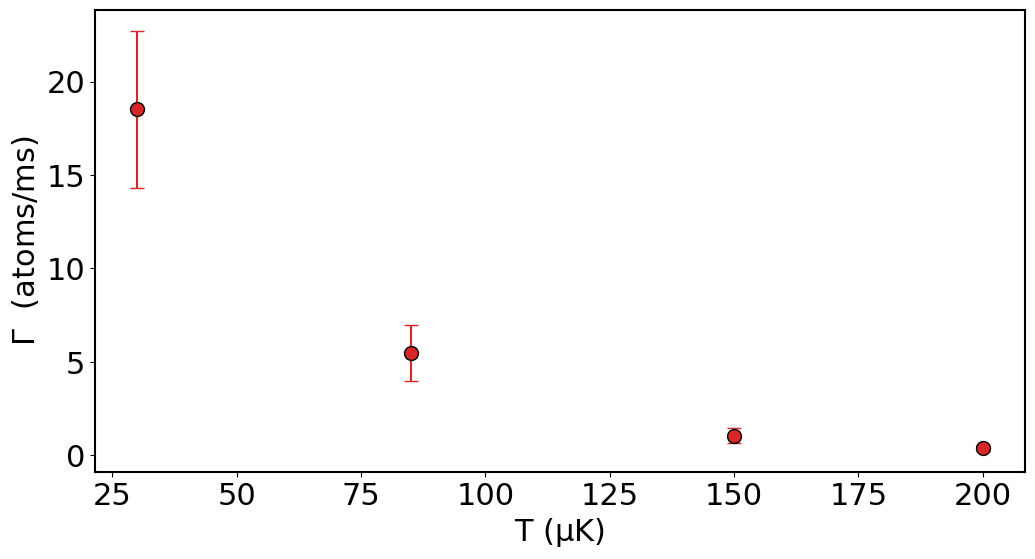

In [37]:
T = [30,85,150,200]

gamma_2Isat = [gamma_30uK_2Isat,gamma_85uK_2Isat,gamma_150uK_2Isat,gamma_200uK_2Isat]
gamma_unc_2Isat = [gamma_30uK_2Isat_unc,gamma_85uK_2Isat_unc,gamma_150uK_2Isat_unc,gamma_200uK_2Isat_unc]
gamma_error_2Isat = [gamma_unc_2Isat,gamma_unc_2Isat]

gamma_Isat = [gamma_30uK_Isat,gamma_85uK_Isat,gamma_150uK_Isat,gamma_200uK_Isat]
gamma_unc_Isat = [gamma_30uK_Isat_unc,gamma_85uK_Isat_unc,gamma_150uK_Isat_unc,gamma_200uK_Isat_unc]
gamma_error_Isat = [gamma_unc_Isat,gamma_unc_Isat]

color1 = 'tab:orange'
color2 = 'tab:red'
fig, ax = plt.subplots(figsize=(12, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(T,gamma_2Isat, yerr=gamma_error_2Isat,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'$2I_{sat}$')
# ax.errorbar(T,gamma_Isat, yerr=gamma_error_Isat,ls='none',ecolor=color1,marker = 'o',markersize = 10,
#             markerfacecolor=color1,markeredgecolor='k',capsize=5,label=r'$I_{sat}$')
# ax.set_yscale('log')
scaleFactor = 2.6
plt.grid(False)
# plt.legend()
# plt.xticks(detuning_valuesD2, detuning_labelsD2)
plt.ylabel(r'$ \Gamma \ \ (\mathrm{atoms/ms)} $')
plt.xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
# plt.title(r'U = 20 MHz, $ \Delta = -75 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize=20) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

In [1306]:

beta30uK_Isat/beta200uK_Isat
gamma_85uK_Isat*2

3.0259927845410877

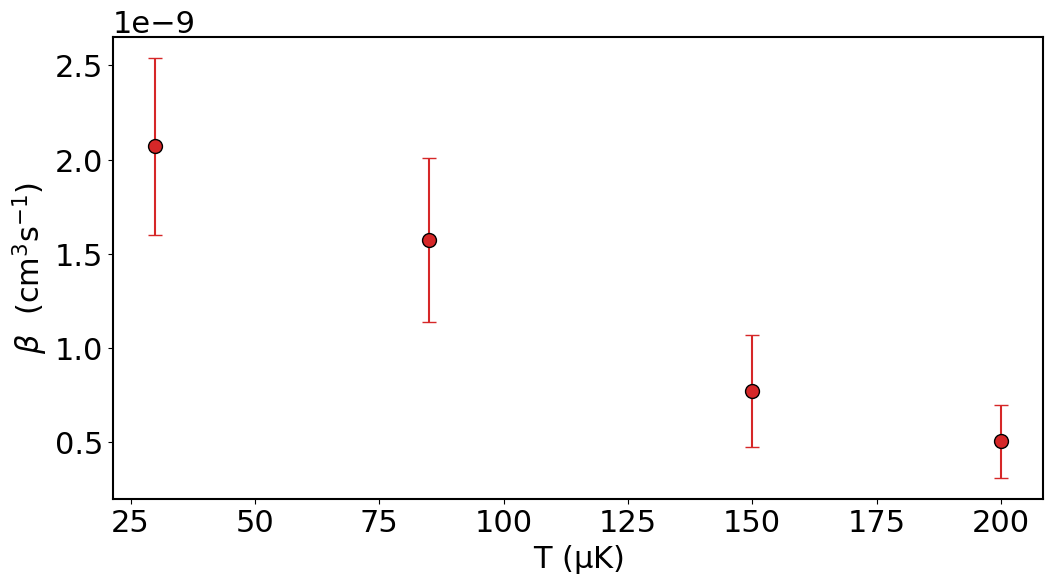

In [38]:
T = [30,85,150,200]

beta30uK_2Isat = betaCalc(gamma_30uK_2Isat,1e-3,40e-6,2)
beta85uK_2Isat = betaCalc(gamma_85uK_2Isat,1e-3,75e-6,2)
beta150uK_2Isat = betaCalc(gamma_150uK_2Isat,1e-3,140e-6,2)
beta200uK_2Isat = betaCalc(gamma_200uK_2Isat,1e-3,200e-6,2)
beta30uK_2Isat_unc = betaCalc(gamma_30uK_2Isat_unc,1e-3,40e-6,2)
beta85uK_2Isat_unc = betaCalc(gamma_85uK_2Isat_unc,1e-3,75e-6,2)
beta150uK_2Isat_unc = betaCalc(gamma_150uK_2Isat_unc,1e-3,140e-6,2)
beta200uK_2Isat_unc = betaCalc(gamma_200uK_2Isat_unc,1e-3,200e-6,2)
betaD2_2Isat = [beta30uK_2Isat,beta85uK_2Isat,beta150uK_2Isat,beta200uK_2Isat]
beta_uncD2_2Isat = [beta30uK_2Isat_unc,beta85uK_2Isat_unc,beta150uK_2Isat_unc,beta200uK_2Isat_unc]
beta_errorD2_2Isat = [beta_uncD2_2Isat,beta_uncD2_2Isat]


beta30uK_Isat = betaCalc(gamma_30uK_Isat,1e-3,40e-6,2)
beta85uK_Isat = betaCalc(gamma_85uK_Isat,1e-3,75e-6,2)
beta150uK_Isat = betaCalc(gamma_150uK_Isat,1e-3,140e-6,2)
beta200uK_Isat = betaCalc(gamma_200uK_Isat,1e-3,200e-6,2)
beta30uK_Isat_unc = betaCalc(gamma_30uK_Isat_unc,1e-3,40e-6,2)
beta85uK_Isat_unc = betaCalc(gamma_85uK_Isat_unc,1e-3,75e-6,2)
beta150uK_Isat_unc = betaCalc(gamma_150uK_Isat_unc,1e-3,140e-6,2)
beta200uK_Isat_unc = betaCalc(gamma_200uK_Isat_unc,1e-3,200e-6,2)
betaD2_Isat = [beta30uK_Isat,beta85uK_Isat,beta150uK_Isat,beta200uK_Isat]
beta_uncD2_Isat = [beta30uK_Isat_unc,beta85uK_Isat_unc,beta150uK_Isat_unc,beta200uK_Isat_unc]
beta_errorD2_Isat = [beta_uncD2_Isat,beta_uncD2_Isat]

color1 = 'tab:orange'
color2 = 'tab:red'
fig, ax = plt.subplots(figsize=(12, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(T,betaD2_2Isat, yerr=beta_errorD2_2Isat,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'$2I_{sat}$')

# ax.errorbar(T,betaD2_Isat, yerr=beta_errorD2_Isat,ls='none',ecolor=color1,marker = 'o',markersize = 10,
#             markerfacecolor=color1,markeredgecolor='k',capsize=5,label=r'$I_{sat}$')


# plt.legend()
scaleFactor = 2.6
plt.grid(False)
# plt.xticks(detuning_valuesD2, detuning_labelsD2)
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
# plt.title(r'U = 20 MHz, $ \Delta = -75 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize = 20) 
plt.rcParams["axes.linewidth"] = 1.5
# plt.ticklabel_format(style='plain') 

## Beta vs temp: To and steady state

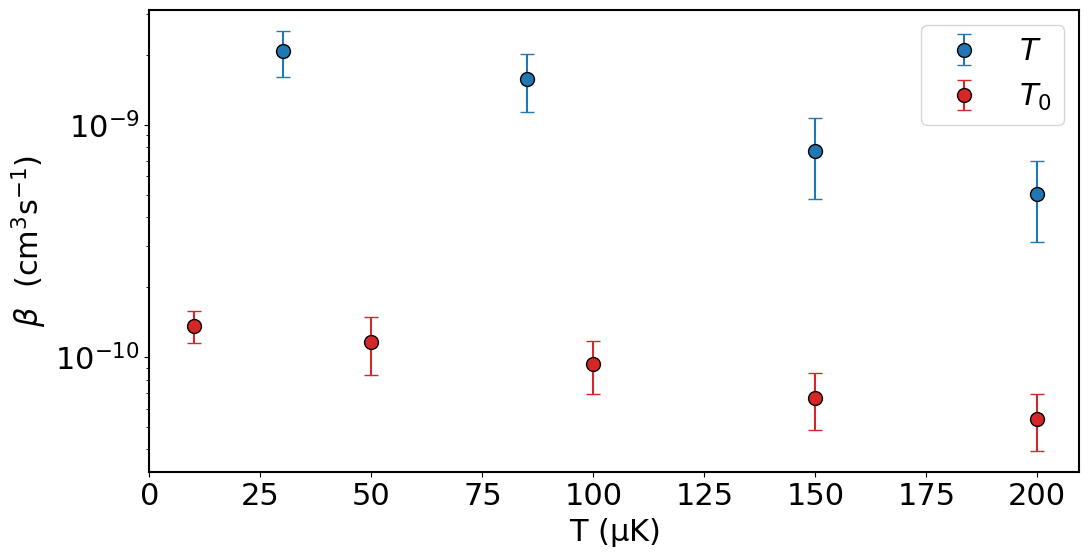

In [40]:
T1 = [30,85,150,200]

beta30uK_2Isat = betaCalc(gamma_30uK_2Isat,1e-3,40e-6,2)
beta85uK_2Isat = betaCalc(gamma_85uK_2Isat,1e-3,75e-6,2)
beta150uK_2Isat = betaCalc(gamma_150uK_2Isat,1e-3,140e-6,2)
beta200uK_2Isat = betaCalc(gamma_200uK_2Isat,1e-3,200e-6,2)
beta30uK_2Isat_unc = betaCalc(gamma_30uK_2Isat_unc,1e-3,40e-6,2)
beta85uK_2Isat_unc = betaCalc(gamma_85uK_2Isat_unc,1e-3,75e-6,2)
beta150uK_2Isat_unc = betaCalc(gamma_150uK_2Isat_unc,1e-3,140e-6,2)
beta200uK_2Isat_unc = betaCalc(gamma_200uK_2Isat_unc,1e-3,200e-6,2)
betaPGC = [beta30uK_2Isat,beta85uK_2Isat,beta150uK_2Isat,beta200uK_2Isat]
beta_unc_PGC = [beta30uK_2Isat_unc,beta85uK_2Isat_unc,beta150uK_2Isat_unc,beta200uK_2Isat_unc]
beta_error_PGC = [beta_unc_PGC,beta_unc_PGC]

T2 = [10,50,100,150,200]

trapDepth=1e-3
beta_10uK = betaCalc(gamma_10uK,.25e-3,10e-6,2)
beta_50uK = betaCalc(gamma_50uK,trapDepth,50e-6,2)
beta_100uK = betaCalc(gamma_100uK,trapDepth,100e-6,2)
beta_150uK = betaCalc(gamma_150uK,trapDepth,150e-6,2)
beta_200uK = betaCalc(gamma_200uK,trapDepth,200e-6,2)
beta_10uK_unc = betaCalc(gamma_10uK_unc,.25e-3,10e-6,2)
beta_50uK_unc = betaCalc(gamma_50uK_unc,trapDepth,50e-6,2)
beta_100uK_unc = betaCalc(gamma_100uK_unc,trapDepth,100e-6,2)
beta_150uK_unc = betaCalc(gamma_150uK_unc,trapDepth,150e-6,2)
beta_200uK_unc = betaCalc(gamma_200uK_unc,trapDepth,200e-6,2)

beta_noPGC = [beta_10uK,beta_50uK,beta_100uK,beta_150uK,beta_200uK]
beta_unc_noPGC = [beta_10uK_unc,beta_50uK_unc,beta_100uK_unc,beta_150uK_unc,beta_200uK_unc]
beta_error_noPGC = [beta_unc_noPGC,beta_unc_noPGC]

color2 = 'tab:blue'
color1 = 'tab:red'
fig, ax = plt.subplots(figsize=(12, 6))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 22}
matplotlib.rc('font', **font)
ax.errorbar(T1,betaPGC, yerr=beta_error_PGC,ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'$T$')

ax.errorbar(T2,beta_noPGC, yerr=beta_error_noPGC,ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5,label=r'$T_0$')

ax.set_yscale('log')
plt.legend()
scaleFactor = 2.6
plt.grid(False)
# plt.xticks(detuning_valuesD2, detuning_labelsD2)
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
# plt.title(r'U = 20 MHz, I=2I_sat, $ \Delta = -75 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize = 20) 
plt.rcParams["axes.linewidth"] = 1.5
labelValues = [0,25,50,75,100,125,150,175,200]
labels = [str(T0) for T0 in labelValues] 
plt.xticks(labelValues, labelValues);

## Save data to file

In [44]:
import pandas as pd

# PGC
x = T1
y = betaPGC
y_err_top = beta_error_PGC[0]
y_err_bot = beta_error_PGC[1]

# Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y, 'y_err_top': y_err_top,'y_err_bot': y_err_bot})

# Save the data to a CSV file
data.to_csv('beta_T_PGC.csv', index=False)


In [45]:
import pandas as pd

# no PGC
x = T2
y = beta_noPGC
y_err_top = beta_error_noPGC[0]
y_err_bot = beta_error_noPGC[1]

# Create a DataFrame with the data
data = pd.DataFrame({'x': x, 'y': y, 'y_err_top': y_err_top,'y_err_bot': y_err_bot})

# Save the data to a CSV file
data.to_csv('beta_T_NoPGC.csv', index=False)


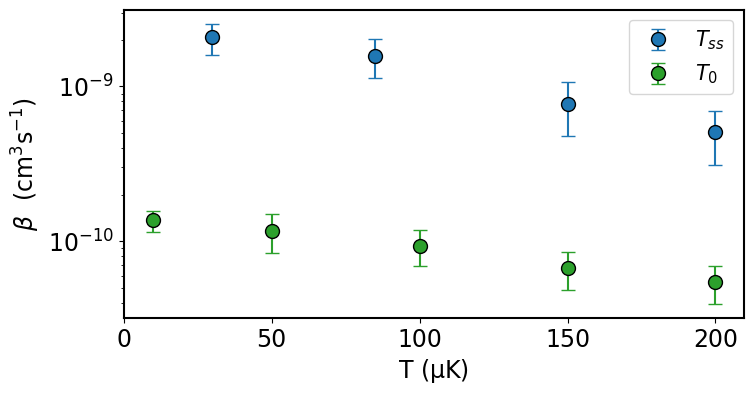

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
# Load the data from the CSV file
dataPGC = pd.read_csv('beta_T_PGC.csv')

# Extract the top and bottom error values
y_err_top = dataPGC['y_err_top']
y_err_bottom = dataPGC['y_err_bot']

# Create a scatter plot with asymmetric error bars
fig, ax = plt.subplots(figsize=(8, 4))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 17}
matplotlib.rc('font', **font)
color1 = 'tab:blue'
ax.errorbar(dataPGC['x'], dataPGC['y'], xerr=None, yerr=[y_err_bottom, y_err_top],ls='none',ecolor=color1,marker = 'o',markersize = 10,
            markerfacecolor=color1,markeredgecolor='k',capsize=5,label=r'$T_{ss}$')


# Load the data from the CSV file
dataNoPGC = pd.read_csv('beta_T_NoPGC.csv')

# Extract the top and bottom error values
y_err_top = dataNoPGC['y_err_top']
y_err_bottom = dataNoPGC['y_err_bot']

color2 = 'tab:green'
ax.errorbar(dataNoPGC['x'], dataNoPGC['y'], xerr=None, yerr=[y_err_bottom, y_err_top],ls='none',ecolor=color2,marker = 'o',markersize = 10,
            markerfacecolor=color2,markeredgecolor='k',capsize=5,label=r'$T_0$')

ax.set_yscale('log')
plt.legend(ncol = 1,loc='upper right',fontsize=15)
scaleFactor = 2.6
plt.grid(False)
# plt.xticks(detuning_valuesD2, detuning_labelsD2)
plt.ylabel(r'$ \beta \ \ \mathrm{(cm^3s^{-1})} $')
plt.xlabel(r'$\mathrm{T} \ (\mathrm{\mu K})$')
# plt.title(r'U = 20 MHz, I=2I_sat, $ \Delta = -75 \ \mathrm{(MHz) \ D2 \ F=2-3}$',fontsize = 20) 
plt.rcParams["axes.linewidth"] = 1.5
labelValues = [0,50,100,150,200]
labels = [str(T0) for T0 in labelValues] 
plt.xticks(labelValues, labelValues);
plt.savefig("beta_vs_temp.png", dpi=600, bbox_inches='tight')